# FaceRecognition using keras

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.models import Model
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.engine.topology import Layer
from keras import backend as K
from sklearn.metrics import accuracy_score
import cv2
import os
import numpy as np
from numpy import genfromtxt
import pandas as pd
import tensorflow as tf
from utils import LRN2D
import utils
import sys
import matplotlib.pyplot as plt

%reload_ext autoreload
%autoreload 2

np.set_printoptions(threshold=sys.maxsize)

Using TensorFlow backend.


In [2]:
myInput = Input(shape=(96, 96, 3))

x = ZeroPadding2D(padding=(3, 3), input_shape=(96, 96, 3))(myInput)
x = Conv2D(64, (7, 7), strides=(2, 2), name='conv1')(x)
x = BatchNormalization(axis=3, epsilon=0.00001, name='bn1')(x)
x = Activation('relu')(x)
x = ZeroPadding2D(padding=(1, 1))(x)
x = MaxPooling2D(pool_size=3, strides=2)(x)
x = Lambda(LRN2D, name='lrn_1')(x)
x = Conv2D(64, (1, 1), name='conv2')(x)
x = BatchNormalization(axis=3, epsilon=0.00001, name='bn2')(x)
x = Activation('relu')(x)
x = ZeroPadding2D(padding=(1, 1))(x)
x = Conv2D(192, (3, 3), name='conv3')(x)
x = BatchNormalization(axis=3, epsilon=0.00001, name='bn3')(x)
x = Activation('relu')(x)
x = Lambda(LRN2D, name='lrn_2')(x)
x = ZeroPadding2D(padding=(1, 1))(x)
x = MaxPooling2D(pool_size=3, strides=2)(x)

# Inception3a
inception_3a_3x3 = Conv2D(96, (1, 1), name='inception_3a_3x3_conv1')(x)
inception_3a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_3x3_bn1')(inception_3a_3x3)
inception_3a_3x3 = Activation('relu')(inception_3a_3x3)
inception_3a_3x3 = ZeroPadding2D(padding=(1, 1))(inception_3a_3x3)
inception_3a_3x3 = Conv2D(128, (3, 3), name='inception_3a_3x3_conv2')(inception_3a_3x3)
inception_3a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_3x3_bn2')(inception_3a_3x3)
inception_3a_3x3 = Activation('relu')(inception_3a_3x3)

inception_3a_5x5 = Conv2D(16, (1, 1), name='inception_3a_5x5_conv1')(x)
inception_3a_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_5x5_bn1')(inception_3a_5x5)
inception_3a_5x5 = Activation('relu')(inception_3a_5x5)
inception_3a_5x5 = ZeroPadding2D(padding=(2, 2))(inception_3a_5x5)
inception_3a_5x5 = Conv2D(32, (5, 5), name='inception_3a_5x5_conv2')(inception_3a_5x5)
inception_3a_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_5x5_bn2')(inception_3a_5x5)
inception_3a_5x5 = Activation('relu')(inception_3a_5x5)

inception_3a_pool = MaxPooling2D(pool_size=3, strides=2)(x)
inception_3a_pool = Conv2D(32, (1, 1), name='inception_3a_pool_conv')(inception_3a_pool)
inception_3a_pool = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_pool_bn')(inception_3a_pool)
inception_3a_pool = Activation('relu')(inception_3a_pool)
inception_3a_pool = ZeroPadding2D(padding=((3, 4), (3, 4)))(inception_3a_pool)

inception_3a_1x1 = Conv2D(64, (1, 1), name='inception_3a_1x1_conv')(x)
inception_3a_1x1 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_1x1_bn')(inception_3a_1x1)
inception_3a_1x1 = Activation('relu')(inception_3a_1x1)

inception_3a = concatenate([inception_3a_3x3, inception_3a_5x5, inception_3a_pool, inception_3a_1x1], axis=3)

# Inception3b
inception_3b_3x3 = Conv2D(96, (1, 1), name='inception_3b_3x3_conv1')(inception_3a)
inception_3b_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_3x3_bn1')(inception_3b_3x3)
inception_3b_3x3 = Activation('relu')(inception_3b_3x3)
inception_3b_3x3 = ZeroPadding2D(padding=(1, 1))(inception_3b_3x3)
inception_3b_3x3 = Conv2D(128, (3, 3), name='inception_3b_3x3_conv2')(inception_3b_3x3)
inception_3b_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_3x3_bn2')(inception_3b_3x3)
inception_3b_3x3 = Activation('relu')(inception_3b_3x3)

inception_3b_5x5 = Conv2D(32, (1, 1), name='inception_3b_5x5_conv1')(inception_3a)
inception_3b_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_5x5_bn1')(inception_3b_5x5)
inception_3b_5x5 = Activation('relu')(inception_3b_5x5)
inception_3b_5x5 = ZeroPadding2D(padding=(2, 2))(inception_3b_5x5)
inception_3b_5x5 = Conv2D(64, (5, 5), name='inception_3b_5x5_conv2')(inception_3b_5x5)
inception_3b_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_5x5_bn2')(inception_3b_5x5)
inception_3b_5x5 = Activation('relu')(inception_3b_5x5)

inception_3b_pool = Lambda(lambda x: x**2, name='power2_3b')(inception_3a)
inception_3b_pool = AveragePooling2D(pool_size=(3, 3), strides=(3, 3))(inception_3b_pool)
inception_3b_pool = Lambda(lambda x: x*9, name='mult9_3b')(inception_3b_pool)
inception_3b_pool = Lambda(lambda x: K.sqrt(x), name='sqrt_3b')(inception_3b_pool)
inception_3b_pool = Conv2D(64, (1, 1), name='inception_3b_pool_conv')(inception_3b_pool)
inception_3b_pool = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_pool_bn')(inception_3b_pool)
inception_3b_pool = Activation('relu')(inception_3b_pool)
inception_3b_pool = ZeroPadding2D(padding=(4, 4))(inception_3b_pool)

inception_3b_1x1 = Conv2D(64, (1, 1), name='inception_3b_1x1_conv')(inception_3a)
inception_3b_1x1 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_1x1_bn')(inception_3b_1x1)
inception_3b_1x1 = Activation('softmax')(inception_3b_1x1)

inception_3b = concatenate([inception_3b_3x3, inception_3b_5x5, inception_3b_pool, inception_3b_1x1], axis=3)

# Inception3c
inception_3c_3x3 = utils.conv2d_bn(inception_3b,
                                   layer='inception_3c_3x3',
                                   cv1_out=128,
                                   cv1_filter=(1, 1),
                                   cv2_out=256,
                                   cv2_filter=(3, 3),
                                   cv2_strides=(2, 2),
                                   padding=(1, 1))

inception_3c_5x5 = utils.conv2d_bn(inception_3b,
                                   layer='inception_3c_5x5',
                                   cv1_out=32,
                                   cv1_filter=(1, 1),
                                   cv2_out=64,
                                   cv2_filter=(5, 5),
                                   cv2_strides=(2, 2),
                                   padding=(2, 2))

inception_3c_pool = MaxPooling2D(pool_size=3, strides=2)(inception_3b)
inception_3c_pool = ZeroPadding2D(padding=((0, 1), (0, 1)))(inception_3c_pool)

inception_3c = concatenate([inception_3c_3x3, inception_3c_5x5, inception_3c_pool], axis=3)

#inception 4a
inception_4a_3x3 = utils.conv2d_bn(inception_3c,
                                   layer='inception_4a_3x3',
                                   cv1_out=96,
                                   cv1_filter=(1, 1),
                                   cv2_out=192,
                                   cv2_filter=(3, 3),
                                   cv2_strides=(1, 1),
                                   padding=(1, 1))
inception_4a_5x5 = utils.conv2d_bn(inception_3c,
                                   layer='inception_4a_5x5',
                                   cv1_out=32,
                                   cv1_filter=(1, 1),
                                   cv2_out=64,
                                   cv2_filter=(5, 5),
                                   cv2_strides=(1, 1),
                                   padding=(2, 2))

inception_4a_pool = Lambda(lambda x: x**2, name='power2_4a')(inception_3c)
inception_4a_pool = AveragePooling2D(pool_size=(3, 3), strides=(3, 3))(inception_4a_pool)
inception_4a_pool = Lambda(lambda x: x*9, name='mult9_4a')(inception_4a_pool)
inception_4a_pool = Lambda(lambda x: K.sqrt(x), name='sqrt_4a')(inception_4a_pool)
inception_4a_pool = utils.conv2d_bn(inception_4a_pool,
                                   layer='inception_4a_pool',
                                   cv1_out=128,
                                   cv1_filter=(1, 1),
                                   padding=(2, 2))
inception_4a_1x1 = utils.conv2d_bn(inception_3c,
                                   layer='inception_4a_1x1',
                                   cv1_out=256,
                                   cv1_filter=(1, 1))
inception_4a = concatenate([inception_4a_3x3, inception_4a_5x5, inception_4a_pool, inception_4a_1x1], axis=3)

#inception4e
inception_4e_3x3 = utils.conv2d_bn(inception_4a,
                                   layer='inception_4e_3x3',
                                   cv1_out=160,
                                   cv1_filter=(1, 1),
                                   cv2_out=256,
                                   cv2_filter=(3, 3),
                                   cv2_strides=(2, 2),
                                   padding=(1, 1))
inception_4e_5x5 = utils.conv2d_bn(inception_4a,
                                   layer='inception_4e_5x5',
                                   cv1_out=64,
                                   cv1_filter=(1, 1),
                                   cv2_out=128,
                                   cv2_filter=(5, 5),
                                   cv2_strides=(2, 2),
                                   padding=(2, 2))
inception_4e_pool = MaxPooling2D(pool_size=3, strides=2)(inception_4a)
inception_4e_pool = ZeroPadding2D(padding=((0, 1), (0, 1)))(inception_4e_pool)

inception_4e = concatenate([inception_4e_3x3, inception_4e_5x5, inception_4e_pool], axis=3)

#inception5a
inception_5a_3x3 = utils.conv2d_bn(inception_4e,
                                   layer='inception_5a_3x3',
                                   cv1_out=96,
                                   cv1_filter=(1, 1),
                                   cv2_out=384,
                                   cv2_filter=(3, 3),
                                   cv2_strides=(1, 1),
                                   padding=(1, 1))

inception_5a_pool = Lambda(lambda x: x**2, name='power2_5a')(inception_4e)
inception_5a_pool = AveragePooling2D(pool_size=(3, 3), strides=(3, 3))(inception_5a_pool)
inception_5a_pool = Lambda(lambda x: x*9, name='mult9_5a')(inception_5a_pool)
inception_5a_pool = Lambda(lambda x: K.sqrt(x), name='sqrt_5a')(inception_5a_pool)
inception_5a_pool = utils.conv2d_bn(inception_5a_pool,
                                   layer='inception_5a_pool',
                                   cv1_out=96,
                                   cv1_filter=(1, 1),
                                   padding=(1, 1))
inception_5a_1x1 = utils.conv2d_bn(inception_4e,
                                   layer='inception_5a_1x1',
                                   cv1_out=256,
                                   cv1_filter=(1, 1))

inception_5a = concatenate([inception_5a_3x3, inception_5a_pool, inception_5a_1x1], axis=3)

#inception_5b
inception_5b_3x3 = utils.conv2d_bn(inception_5a,
                                   layer='inception_5b_3x3',
                                   cv1_out=96,
                                   cv1_filter=(1, 1),
                                   cv2_out=384,
                                   cv2_filter=(3, 3),
                                   cv2_strides=(1, 1),
                                   padding=(1, 1))
inception_5b_pool = MaxPooling2D(pool_size=3, strides=2)(inception_5a)
inception_5b_pool = utils.conv2d_bn(inception_5b_pool,
                                   layer='inception_5b_pool',
                                   cv1_out=96,
                                   cv1_filter=(1, 1))
inception_5b_pool = ZeroPadding2D(padding=(1, 1))(inception_5b_pool)

inception_5b_1x1 = utils.conv2d_bn(inception_5a,
                                   layer='inception_5b_1x1',
                                   cv1_out=256,
                                   cv1_filter=(1, 1))
inception_5b = concatenate([inception_5b_3x3, inception_5b_pool, inception_5b_1x1], axis=3)

av_pool = AveragePooling2D(pool_size=(3, 3), strides=(1, 1))(inception_5b)
reshape_layer = Flatten()(av_pool)
dense_layer = Dense(128, name='dense_layer')(reshape_layer)
norm_layer = Lambda(lambda  x: K.l2_normalize(x, axis=1), name='norm_layer')(dense_layer)


# Final Model
model = Model(inputs=[myInput], outputs=norm_layer)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.




In [ ]:

print("Number of training samples: %d", tf.data.experimental.cardinality(train_ds))
print(
    "Number of validation samples: %d" , tf.data.experimental.cardinality(validation_ds)
)
print("Number of test samples: %d" , tf.data.experimental.cardinality(test_ds))

size = (150, 150)

train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, size), y))
validation_ds = validation_ds.map(lambda x, y: (tf.image.resize(x, size), y))
test_ds = test_ds.map(lambda x, y: (tf.image.resize(x, size), y))

batch_size = 32

train_ds = train_ds.cache().batch(batch_size).prefetch(buffer_size=10)
validation_ds = validation_ds.cache().batch(batch_size).prefetch(buffer_size=10)
test_ds = test_ds.cache().batch(batch_size).prefetch(buffer_size=10)


In [ ]:
os.environ['TF_KERAS'] = '1'
from keras.optimizers import adam

model.compile(
    optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['binary_accuracy'],
)
epochs = 20
model.fit(train_ds, epochs=epochs, validation_data=validation_ds)

In [3]:
# model.compile(optimizer=tf.keras.optimizers.Adam(),  # 1
#               loss='categorical_crossentropy',  # 2
#               metrics=['accuracy'])  # 3
print(model.inputs)
print(model.outputs)
# model.metrics_names
# model.summary()
# print('Number of trainable variables = {}'.format(len(model.trainable_variables)))

[<tf.Tensor 'input_1:0' shape=(?, 96, 96, 3) dtype=float32>]
[<tf.Tensor 'norm_layer/l2_normalize:0' shape=(?, 128) dtype=float32>]


In [3]:
#Loading the model with pretrained weights
# FaceNet is trained by minimizing the triplet loss. I will be loading a previously trained model. weights are avaiable at https://github.com/iwantooxxoox/Keras-OpenFace in the "weights" folder which is also provided in this source.

# This can take a couple of minutes to execute and depends on the speed of your machine.

# Load weights from csv files (which was exported from Openface torch model)
weights = utils.weights
weights_dict = utils.load_weights()

# Set layer weights of the model
for name in weights:
  if model.get_layer(name) != None:
    model.get_layer(name).set_weights(weights_dict[name])
  elif model.get_layer(name) != None:
    model.get_layer(name).set_weights(weights_dict[name])
    
#saving the model
model.save('./model/nn4.small2.lrn.h5')    

In [ ]:
epochs = 20
model.fit(train_ds, epochs=epochs, validation_data=validation_ds)

In [2]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
model = load_model('./model/nn4.small2.lrn.h5')
# from keras.utils import CustomObjectScope
import tensorflow as tf
# with CustomObjectScope({'tf': tf}):
#     model = load_model('./model/nn4.small2.lrn.h5')

# About <font color=blue>image_to_embedding</font> function
# When the model is loaded with pre trained weights, then we can create the 128 dimensional embedding vectors for all the face images stored in the "images" folder. 
# "image_to_embedding" function pass an image to the Inception network to generate the embedding vector.

def image_to_embedding(image, model):
#     image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_AREA)
#     print(image)
    img_raw = image.copy()
#     print(img_raw)
    image = cv2.resize(img_raw, (96, 96)) 
#     print(image.shape)
    img = image[...,::-1]
    img = np.around(np.transpose(img, (0,1,2))/255.0, decimals=12)
    x_train = np.array([img])
    embedding = model.predict_on_batch(x_train)
#     print(embedding)
    return embedding

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [3]:
# About <font color=blue>recognize_face</font> function
# This function calculate similarity between the captured image and the images that are already been stored. It passes the image to the trained neural network to generate its embedding vector. Which is then compared with all the embedding vectors of the images stored by calculating L2 Euclidean distance.

# If the minimum L2 distance between two embeddings is less than a threshold (here I have taken the threshold as .68 (which can be adjusted) then we have a match.

def recognize_face(face_image, input_embeddings, model,threshed1):
#     print(face_image)
    embedding = image_to_embedding(face_image, model)
#     print("embedding",embedding)
    minimum_distance = 200
    name = None

    
    # Loop over  names and encodings.
    for (input_name, input_embedding) in input_embeddings.items():
        
       
        euclidean_distance = np.linalg.norm(embedding-input_embedding)
        

#         print('Euclidean distance from %s is %s' %(input_name, euclidean_distance))
#         print('threshold %s is %s' %(input_name, threshed1))
        
        if euclidean_distance < minimum_distance:
            minimum_distance = euclidean_distance
            name = input_name
    
    if (minimum_distance < threshed1.any()):
        return str(name)
    else:
        return None

In [68]:
# About <font color=blue>create_input_image_embeddings</font> function
# This function generates 128 dimensional image ebeddings of all the images stored in the "images" directory by feed forwarding the images to a trained neural network. It creates a dictionary with key as the name of the face and value as embedding

# About <font color=blue>recognize_faces_in_cam</font> function
# This function capture image from the webcam, detect a face in it and crop the image to have a face only, which is then passed to recognize_face function

import glob
import matplotlib.pyplot as plt
%matplotlib inline
def create_input_image_embeddings():
    input_embeddings = {}

    for file in glob.glob("PCA-face/png_images/*"):
        person_name = os.path.splitext(os.path.basename(file))[0]
        image_file = cv2.imread(file, 1)
        input_embeddings[person_name] = image_to_embedding(image_file, model)

    return input_embeddings

def recognize_faces_in_cam(input_embeddings):
    
    count = 0
#     cv2.namedWindow("Face Recognizer")
#     vc = cv2.VideoCapture(0)
#     for file in glob.glob("images/*"):
#         test_image = cv2.imread(file)
    test_image = cv2.imread('images/IMG_0003.jpg')


    font = cv2.FONT_HERSHEY_SIMPLEX
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')


    #     while vc.isOpened():
    #     while(True):
    #         _, frame = cv2.imread('images/IMG_0002.jpg')
    #         img = frame
    height, width, channels = test_image.shape

    gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.2, 5)
    print("Found {0} faces!".format(len(faces)))


    # Loop through all the faces detected 
    identities = []
    for (x, y, w, h) in faces:
        x1 = x
        y1 = y
        x2 = x+w
        y2 = y+h

        def convertToRGB(image):
            return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        face_image = test_image[max(0, y1):min(height, y2), max(0, x1):min(width, x2)]
#         face_image = test_image
    #             threshed1 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
    #                 cv2.THRESH_BINARY,11,2)
        th, threshed1 = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
        b,g,r = cv2.split(test_image)

    #             print("adaptivethreshold:",threshed1)
        identity = recognize_face(face_image, input_embeddings, model,threshed1)

        print(identity)

        if identity is not None:
            img = cv2.rectangle(test_image,(x1, y1),(x2, y2),(255,255,255),8)
#             print("img1",img)
            cv2.putText(img, str(identity), (x1+5,y1-5), font, 3, (255,255,255), 8)

    #         key = cv2.waitKey(100)
#             print("img2",img)
#     cv2.imshow("Face Recognizer", img)
#     cv2.imshow("Resized image", img)

        plt.imshow(convertToRGB(img))

    #         if key == 27: # exit on ESC
    #             break
        count += 1
#         Save the captured image into the datasets folder
#             cv2.imwrite("PCA-face/Output-images/User_" + str(count) + ".jpg", img)
        plt.savefig('PCA-face/Output-images/User{0}_img'.format(len(img)))
cv2.waitKey(0)
cv2.destroyAllWindows()        

In [57]:
# Capturing the face image
# Following code captures 10 face images of the person. They all are stored in "images" folder with the name User_1 to User_10. Select a good captured image from the set of 10 images. Rename it with the name of person and delete rest of them. This image will be used for recognizing the the identity of the person using one shot learning.
import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline
cam = cv2.VideoCapture(0)
# test_image=np.array('images/Test_images/IMG_0003.tga')
test_image = cv2.imread('images/IMG_0002.jpg')
face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

count = 0
while(True):
    ret, img = cam.read()
    faces = face_detector.detectMultiScale(img, 1.2, 5)
    #Converting to grayscale
# test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
# mean=cv2.mean(test_image_gray)
# print(mean)
# b,g,r = cv2.split(test_image_gray)
# th, threshed1 = cv2.threshold(test_image_gray, 100, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
# th, threshed2 = cv2.threshold(b, 100, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
# cv2.imwrite("threshed_gray.png", threshed1)
# cv2.imwrite("threshed_blue.png", threshed2)
# Displaying the grayscale image
# plt.imshow(test_image_gray, cmap='gray')
    for (x,y,w,h) in faces:
        x1 = x
        y1 = y
        x2 = x+w
        y2 = y+h
        cv2.rectangle(test_image, (x1,y1), (x2,y2), (255,255,255), 2)
        count += 1
#         Save the captured image into the datasets folder
        cv2.imwrite("images/User_" + str(count) + ".jpg", img[y1:y2,x1:x2])
        cv2.imshow('image', img)
    k = cv2.waitKey(200) & 0xff # Press 'ESC' for exiting video
    if k == 27:
        break  
#     convert image to RGB and show image

# plt.imshow(convertToRGB(test_image))
    elif count >= 10: # Take 30 face sample and stop video
         break
cam.release()
cv2.destroyAllWindows()

NameError: name 'cam' is not defined

In [57]:
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_detector.detectMultiScale(test_image_gray, 1.2, 5)
  # Let us print the no. of faces found
print('Faces found: ', len(faces))

Faces found:  12


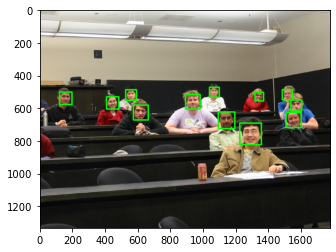

In [58]:
for (x,y,w,h) in faces:
     cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 8)
#convert image to RGB and show image

plt.imshow(convertToRGB(test_image))

Found 3 faces!
005
001
appu


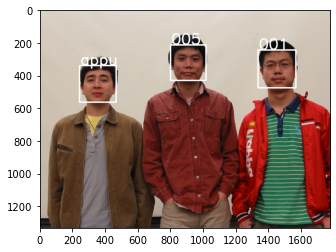

In [69]:
# Lets run the face recognizer program :-)

input_embeddings = create_input_image_embeddings()
recognize_faces_in_cam(input_embeddings)

In [ ]:
pip install facenet

In [ ]:
import tensorflow as tf

# Create a simple Keras model.
# x = [-1, 0, 1, 2, 3, 4]
# y = [-3, -1, 1, 3, 5, 7]

# model = tf.keras.models.Sequential(
#     [tf.keras.layers.Dense(units=1, input_shape=[1])])
# model.compile(optimizer='sgd', loss='mean_squared_error')
# model.fit(x, y, epochs=50)

def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
    """
    Freezes the state of a session into a pruned computation graph.

    Creates a new computation graph where variable nodes are replaced by
    constants taking their current value in the session. The new graph will be
    pruned so subgraphs that are not necessary to compute the requested
    outputs are removed.
    @param session The TensorFlow session to be frozen.
    @param keep_var_names A list of variable names that should not be frozen,
                          or None to freeze all the variables in the graph.
    @param output_names Names of the relevant graph outputs.
    @param clear_devices Remove the device directives from the graph for better portability.
    @return The frozen graph definition.
    """
    graph = session.graph
    with graph.as_default():
        freeze_var_names = list(set(v.op.name for v in tf.global_variables()).difference(keep_var_names or []))
        output_names = output_names or []
        output_names += [v.op.name for v in tf.global_variables()]
        input_graph_def = graph.as_graph_def()
        if clear_devices:
            for node in input_graph_def.node:
                node.device = ""
        frozen_graph = tf.graph_util.convert_variables_to_constants(
            session, input_graph_def, output_names, freeze_var_names)
        return frozen_graph

    
#save keras model as tf pb files    
from keras import backend as K

# Create, compile and train model...

frozen_graph = freeze_session(K.get_session(),
                              output_names=[out.op.name for out in model.outputs]) 

tf.train.write_graph(frozen_graph, "model", "my_model.pb", as_text=False)

In [ ]:
from tensorflow.python.platform import gfile
with tf.Session() as sess:
    # load model from pb file
    with gfile.FastGFile('model'+'/'+'my_model.pb','rb') as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())
        sess.graph.as_default()
        g_in = tf.import_graph_def(graph_def)

In [ ]:
# write to tensorboard (check tensorboard for each op names)
writer = tf.summary.FileWriter('model'+'/log/')
writer.add_graph(sess.graph)
writer.flush()
writer.close()

In [ ]:
# print all operation names 
print('\n===== ouptut operation names =====\n')
# for op in sess.graph.get_operations():
#     print(op)
# inference by the model (op name must comes with :0 to specify the index of its output)
tensor_output = sess.graph.get_tensor_by_name('import/dense_3/Sigmoid:0')
tensor_input = sess.graph.get_tensor_by_name('import/dense_1_input:0')
predictions = sess.run(tensor_output, {tensor_input: x})
print('\n===== output predicted results =====\n')
print(predictions)

In [ ]:
import sys
sys.path
%set_env PYTHONPATH="$PYTHONPATH:/facenet/src"

In [ ]:
python facenet/align_dataset.py --image_dir datasets/lfw/raw \
                        --pairs_file_name pairs \
                        --num_folds 10 \
                        --num_matches_mismatches NUMBER_OF_MATCHES_AND_MISMATCHES

In [ ]:
# model = load_model('./model/nn4.small2.lrn.h5')
from keras.utils import CustomObjectScope
import tensorflow as tf
with CustomObjectScope({'tf': tf}):
    model = load_model('./model/nn4.small2.lrn.h5')

# Read a sample image as input to test the model
img = cv2.imread('./data/lfw/lfw_aligned_160/Aaron_Eckhart/Aaron_Eckhart_0001.png', 1)
img = img[...,::-1]
img = cv2.resize(img, (96, 96))
img = np.around(np.transpose(img, (0,1,2))/255.0, decimals=12)
# print img.shape
x_train = np.array([img])
y = model.predict_on_batch(x_train)
# print(y)

In [70]:
model.layers

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [91]:
train_dir='./data/lfw/training/'
val_dir='./data/lfw/validation/'

#Fit the model using Data Augemnetation, will improve accuracy of the model
from tensorflow.python.keras.applications.inception_v3 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

data_generator_with_aug = ImageDataGenerator(preprocessing_function=preprocess_input,
                                              horizontal_flip = True,
                                              
                                              rotation_range=20,
                                              width_shift_range = 0.2,
                                              height_shift_range = 0.2)
            
data_generator_no_aug = ImageDataGenerator(preprocessing_function=preprocess_input)

In [72]:
model.metrics_names
# model.summary()

['loss']

In [73]:
image_size =96

train_generator = data_generator_with_aug.flow_from_directory(
       directory = train_dir,
       target_size=(image_size, image_size),
       batch_size=42,
       class_mode='categorical')

validation_generator = data_generator_no_aug.flow_from_directory(
       directory = val_dir,
       target_size=(image_size, image_size),
       class_mode='categorical')

Found 283 images belonging to 128 classes.
Found 279 images belonging to 128 classes.


In [92]:
from keras import callbacks 
earlystopping = callbacks.EarlyStopping(monitor ="val_loss",  
                                        mode ="min", patience = 5,  
                                        restore_best_weights = True) 

In [93]:
model_history = model.fit_generator(
        train_generator,
        steps_per_epoch=46,
        epochs=32,
        validation_data=validation_generator,
        validation_steps=1,callbacks =[earlystopping])

Epoch 1/32


RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [ ]:
model.save('./model/incept_ez.h5')  # creates a HDF5 file 'my_model.h5'

In [76]:
print(model_history.history.keys())

NameError: name 'model_history' is not defined

In [77]:
import pandas as pd
history = pd.DataFrame()
history["acc"] = model_history.history["accuracy"]
history["val_acc"] = model_history.history["val_accuracy"]
history.plot(figsize=(12, 6))

NameError: name 'model_history' is not defined

In [94]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(acc) + 1)

import matplotlib.pyplot as plt

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()


NameError: name 'model_history' is not defined

In [78]:
# LFW TEST
import lfw
import os
import numpy as np
import math
import facenet.src.facenet as facenet
import time
import tensorflow as tf

%reload_ext autoreload
%autoreload 2

lfw_pairs='data/lfw/pairs.txt'
lfw_dir='data/lfw/lfw_aligned_160'
lfw_file_ext='png'
lfw_nrof_folds=10
image_size=96
batch_size=100

pairs = lfw.read_pairs(os.path.expanduser(lfw_pairs))

# Get the paths for the corresponding images
paths, actual_issame = lfw.get_paths(os.path.expanduser(lfw_dir), pairs, lfw_file_ext)

embedding_size=128
nrof_images = len(paths)
nrof_batches = int(math.ceil(1.0*nrof_images / batch_size))
emb_array = np.zeros((nrof_images, embedding_size))

# print paths

for i in range(nrof_batches):
  start_index = i*batch_size
  end_index = min((i+1)*batch_size, nrof_images)
  paths_batch = paths[start_index:end_index]
  images = facenet.load_data(paths_batch, False, False, image_size)
#   images = np.transpose(images, (0,3,1,2))
  
  t0 = time.time()
  y = model.predict_on_batch(images)
  emb_array[start_index:end_index,:] = y
#   print('y', y)
#   print('emb', emb_array[start_index:end_index,:])
  t1 = time.time()
  
  print('batch: ', i, ' time: ', t1-t0)

from sklearn import metrics
from scipy.optimize import brentq
from scipy import interpolate

tpr, fpr, accuracy, val, val_std, far = lfw.evaluate(emb_array, 
                actual_issame, nrof_folds=lfw_nrof_folds)

print('Accuracy: %1.3f+-%1.3f' % (np.mean(accuracy), np.std(accuracy)))
print('Validation rate: %2.5f+-%2.5f @ FAR=%2.5f' % (val, val_std, far))
auc = metrics.auc(fpr, tpr)
print('Area Under Curve (AUC): %1.3f' % auc)

eer = brentq(lambda x: 1. - x - interpolate.interp1d(fpr, tpr)(x), 0., 1.)
print('Equal Error Rate (EER): %1.3f' % eer)

batch:  0  time:  0.7512049674987793
batch:  1  time:  0.5500609874725342
batch:  2  time:  0.5614454746246338
batch:  3  time:  0.5684542655944824
batch:  4  time:  0.5415041446685791
batch:  5  time:  0.5505025386810303
batch:  6  time:  0.5400195121765137
batch:  7  time:  0.5464878082275391
batch:  8  time:  0.5519471168518066
batch:  9  time:  0.6791343688964844
batch:  10  time:  0.6412832736968994
batch:  11  time:  0.7913966178894043
batch:  12  time:  0.7186136245727539
batch:  13  time:  0.806631326675415
batch:  14  time:  0.7186088562011719
batch:  15  time:  0.5964055061340332
batch:  16  time:  0.6612329483032227
batch:  17  time:  0.698082685470581
batch:  18  time:  0.7359869480133057
batch:  19  time:  0.5813980102539062
batch:  20  time:  0.6721537113189697
batch:  21  time:  0.6562457084655762
batch:  22  time:  0.6701688766479492
batch:  23  time:  0.5913715362548828
batch:  24  time:  0.5554680824279785
batch:  25  time:  0.5644900798797607
batch:  26  time:  0.550

In [79]:
np.savetxt("emb_array.csv", emb_array, delimiter=",")

In [80]:
emb_array = np.genfromtxt("/Users/AparnaChoubey/try/python-projects/DeepLearningfaceRecog/emb_array.csv", delimiter=",")

In [81]:
from sklearn import metrics
from scipy.optimize import brentq
# from scipy import interpolate
from scipy.optimize import brentq
from scipy.interpolate import interp1d


tpr, fpr, accuracy, val, val_std, far = lfw.evaluate(emb_array, 
                actual_issame, nrof_folds=lfw_nrof_folds)

# print(accuracy)
print('Accuracy: %1.3f+-%1.3f' % (np.mean(accuracy), np.std(accuracy)))
print('Validation rate: %2.5f+-%2.5f @ FAR=%2.5f' % (val, val_std, far))
auc = metrics.auc(fpr, tpr)
print('Area Under Curve (AUC): %1.3f' % auc)

eer = brentq(lambda x: 1. - x - interpolate.interp1d(fpr, tpr)(x), 0., 1.)
print('Equal Error Rate (EER): %1.3f' % eer)

Accuracy: 0.604+-0.021
Validation rate: 0.00767+-0.00300 @ FAR=0.00100
Area Under Curve (AUC): 0.639
Equal Error Rate (EER): 0.394


In [84]:
base_dir = "data/lfw/raw"

# We are trying to minimize the resolution of the images without loosing the 'Features'
# For facial recognition, this seems to be working fine, you can increase or decrease it
IMAGE_SIZE = 224

# Depending upon the total number of images you have set the batch size
# I have 50 images per person (which still won't give very accurate result)
# Hence, I am setting my batch size to 5
# So in 10 epochs/iterations batch size of 5 will be processed and trained
BATCH_SIZE = 5

# We need a data generator which rescales the images
# Pre-processes the images like re-scaling and other required operations for the next steps
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1. / 255,
    validation_split=0.2)

# We separate out data set into Training, Validation & Testing. Mostly you will see Training and Validation.
# We create generators for that, here we have train and validation generator.
# Create a train_generator
train_generator = data_generator.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training')

# Create a validation generator
val_generator = data_generator.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation')

# Triggering a training generator for all the batches
for image_batch, label_batch in train_generator:
    break
    
# This will print all classification labels in the console
print(train_generator.class_indices)


Found 12161 images belonging to 5749 classes.
Found 1072 images belonging to 5749 classes.
{'AJ_Cook': 0, 'AJ_Lamas': 1, 'Aaron_Eckhart': 2, 'Aaron_Guiel': 3, 'Aaron_Patterson': 4, 'Aaron_Peirsol': 5, 'Aaron_Pena': 6, 'Aaron_Sorkin': 7, 'Aaron_Tippin': 8, 'Abba_Eban': 9, 'Abbas_Kiarostami': 10, 'Abdel_Aziz_Al-Hakim': 11, 'Abdel_Madi_Shabneh': 12, 'Abdel_Nasser_Assidi': 13, 'Abdoulaye_Wade': 14, 'Abdul_Majeed_Shobokshi': 15, 'Abdul_Rahman': 16, 'Abdulaziz_Kamilov': 17, 'Abdullah': 18, 'Abdullah_Ahmad_Badawi': 19, 'Abdullah_Gul': 20, 'Abdullah_Nasseef': 21, 'Abdullah_al-Attiyah': 22, 'Abdullatif_Sener': 23, 'Abel_Aguilar': 24, 'Abel_Pacheco': 25, 'Abid_Hamid_Mahmud_Al-Tikriti': 26, 'Abner_Martinez': 27, 'Abraham_Foxman': 28, 'Aby_Har-Even': 29, 'Adam_Ant': 30, 'Adam_Freier': 31, 'Adam_Herbert': 32, 'Adam_Kennedy': 33, 'Adam_Mair': 34, 'Adam_Rich': 35, 'Adam_Sandler': 36, 'Adam_Scott': 37, 'Adel_Al-Jubeir': 38, 'Adelina_Avila': 39, 'Adisai_Bodharamik': 40, 'Adolfo_Aguilar_Zinser': 41, 'Ad

In [85]:
# Creating a file which will contain all names in the format of next lines
labels = '\n'.join(sorted(train_generator.class_indices.keys()))

# Writing it out to the file which will be named 'labels.txt'
with open('labels.txt', 'w') as f:
    f.write(labels)

In [86]:
model.metrics_names
# Printing some statistics
# print('Number of trainable variables = {}'.format(len(model.trainable_variables)))

['loss']

In [98]:
from keras.optimizers import SGD

# model = tf.keras.Sequential([
#     model,  # 1
#     tf.keras.layers.Conv2D(32, 3, activation='relu'),  # 2
#     tf.keras.layers.Dropout(0.2),  # 3
#     tf.keras.layers.GlobalAveragePooling2D(),  # 4
#     tf.keras.layers.Dense(6, activation='softmax')  # 5
# ])


# We will do it in 10 Iterations
epochs = 10
model.compile(optimizer='sgd', loss='mean_squared_error')
# Fitting / Training the model
history = model.fit(train_generator,
                    epochs=epochs,
                    validation_data=val_generator)

Epoch 1/10


ValueError: Error when checking input: expected input_1 to have shape (96, 96, 3) but got array with shape (224, 224, 3)

In [82]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy')
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0, 1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


AttributeError: 'DataFrame' object has no attribute 'history'